   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               37                  25                           12
1  2017               15                   6                            9
2  2018               18                   8                           10
3  2019               25                  14                           11
4  2020               19                  14                            5
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64

Model Summary for Accidents at Track:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Accidents at Track   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:          

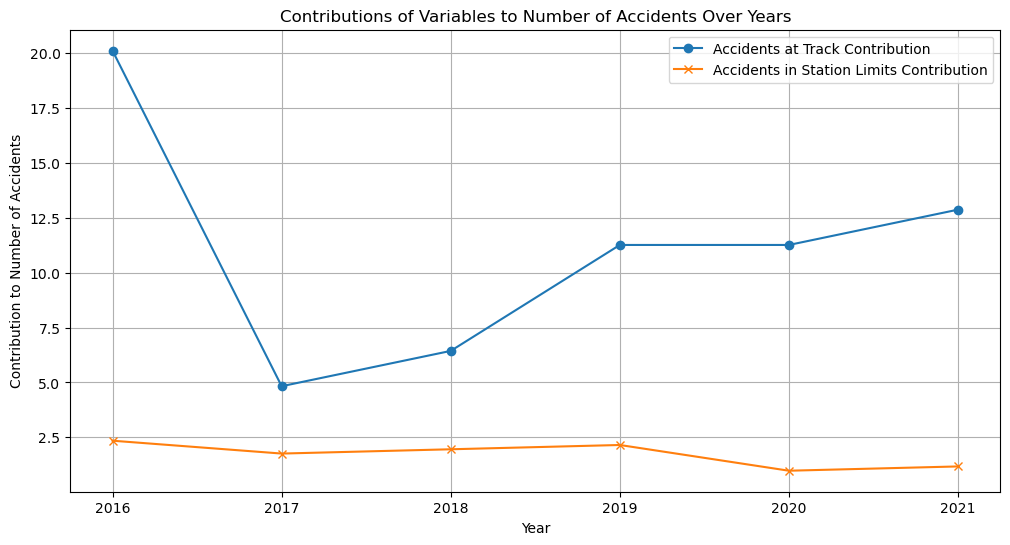

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
df = df.fillna(method='ffill')

# Define the independent (predictor) and dependent (response) variables
X = df[['No of Accidents']]
y = df[['Accidents at Track', 'Accidents in Station Limits']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit a Normal GLM model for each dependent variable
results = {}
for column in y.columns:
    model = sm.GLM(y[column], X, family=sm.families.Gaussian()).fit()
    results[column] = model
    print(f"\nModel Summary for {column}:")
    print(model.summary())

# Function to save summary to file
def save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"Deviance: {deviance}\n")
        f.write(f"AIC: {aic}\n")
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save the summaries
for column, result in results.items():
    model_name = f"{column} Prediction"
    summary = result.summary()
    deviance = result.deviance
    aic = result.aic
    null_deviance = result.null_deviance
    pseudo_r_squared = 1 - (deviance / null_deviance)
    save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared)

# Print the DataFrame
print("\nDataFrame:")
print(df)

# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * results['Accidents at Track'].params['No of Accidents'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * results['Accidents in Station Limits'].params['No of Accidents'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


   Year  No of accidents  Derailments  Collisions  Collisions at LC  \
0  2016               37           15           9                11   
1  2017               15           10           1                 4   
2  2018               18           13           2                 3   
3  2019               25           14           2                 8   
4  2020               19            8           4                 7   
5  2021               22           14           1                 5   

   Fire Accidents  Overshooting   
0               1              1  
1               0              0  
2               0              0  
3               1              0  
4               0              0  
5               1              1  

Model Summary for Derailments Prediction:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            Derailments   No. Observations:                    6
Model:                            GLM   Df Residuals:   

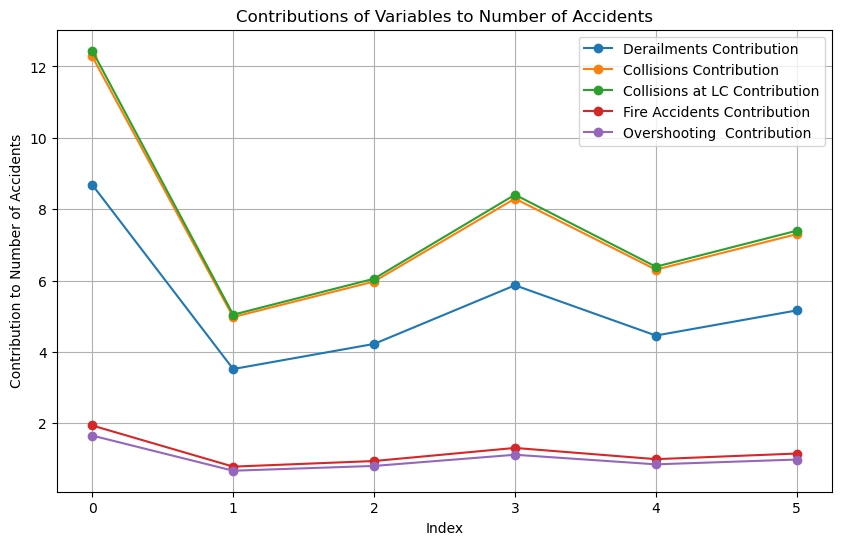

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare the data
file_path = 'combined.xlsx'
sheet_name = 'Accident Types'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.fillna(method='ffill')

# Print the DataFrame
print(df)

# Define the independent (predictor) and dependent (response) variables
X = df['No of accidents']
y = df[['Derailments', 'Collisions', 'Collisions at LC', 'Fire Accidents', 'Overshooting ']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model for each dependent variable
models = {}
for col in y.columns:
    glm_normal = sm.GLM(y[col], X, family=sm.families.Gaussian(link=sm.families.links.identity()))
    glm_normal_results = glm_normal.fit()
    models[col] = glm_normal_results

    # Print the summary
    print(f"\nModel Summary for {col} Prediction:")
    print(glm_normal_results.summary())

# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Plot each variable's contribution
for col in y.columns:
    plt.plot(df.index, df['No of accidents'] * models[col].params['No of accidents'], label=f'{col} Contribution', marker='o')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No_of_Accidents  Main_Line  Branch_Line
0  2016               37         25           12
1  2017               15          8            7
2  2018               18          8           10
3  2019               25         14           11
4  2020               19         14            5
5  2021               22         13            9


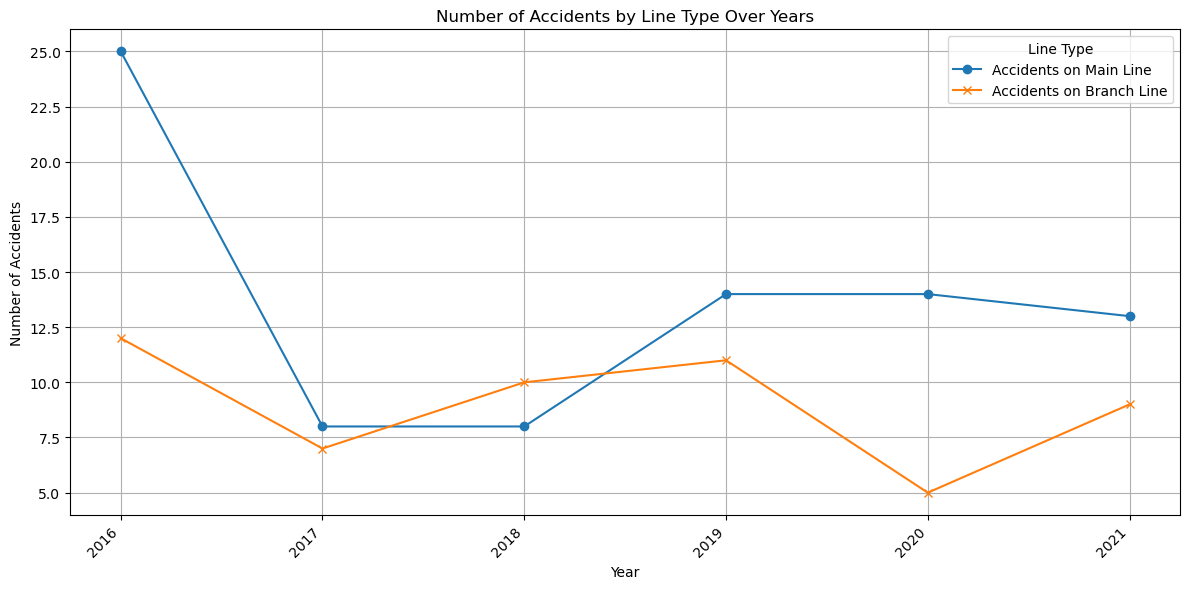

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Type of Line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Print the dataframe
print(df)

# Define the dependent (response) variable and independent (predictor) variables
X = df[['No_of_Accidents']]
y_main = df['Main_Line']
y_branch = df['Branch_Line']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM with Gaussian family
glm_gaussian_main = sm.GLM(y_main, X, family=sm.families.Gaussian()).fit()
glm_gaussian_branch = sm.GLM(y_branch, X, family=sm.families.Gaussian()).fit()

# Function to save summary to file
def save_summary_to_file(model_name, model, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(model.summary()))
        f.write(f"Deviance: {model.deviance}\n")
        f.write(f"AIC: {model.aic}\n")
        pseudo_r_squared = 1 - (model.deviance / model.null_deviance)
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save the summaries
save_summary_to_file('Main Line Accidents Prediction', glm_gaussian_main)
save_summary_to_file('Branch Line Accidents Prediction', glm_gaussian_branch)

# Plotting the actual values for each line type over years
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Main_Line'], label='Accidents on Main Line', marker='o')
plt.plot(df['Year'], df['Branch_Line'], label='Accidents on Branch Line', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Line Type Over Years')
plt.legend(title='Line Type')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit labels
plt.savefig('accidents_by_line_and_year.png')
plt.show()
